In [ ]:
!pip install tensorboard

In [1]:
import matplotlib as plt

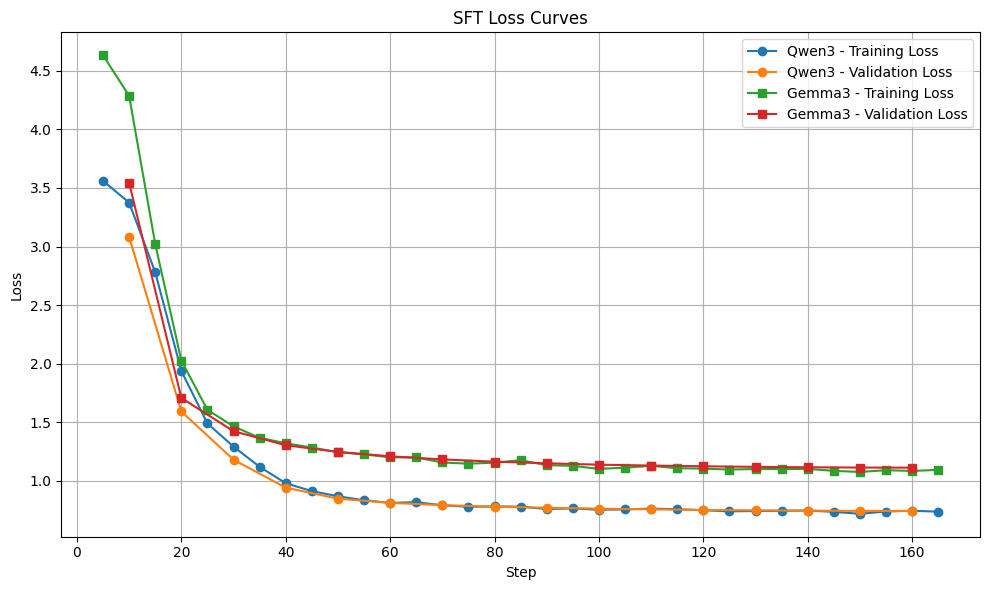

In [6]:
import os
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator

# Load scalar logs from a run
def load_scalars(run_dir, tag):
    ea = event_accumulator.EventAccumulator(run_dir)
    ea.Reload()
    events = ea.Scalars(tag)
    steps = [e.step for e in events]
    values = [e.value for e in events]
    return steps, values

# Paths to each run directory
qwen_run = 'data/runs/qwen3_sft'
gemma_run = 'data/runs/gemma3_sft'

# Load each loss curve
qwen_train_steps, qwen_train = load_scalars(qwen_run, 'train/loss')
qwen_val_steps, qwen_val = load_scalars(qwen_run, 'eval/loss')

gemma_train_steps, gemma_train = load_scalars(gemma_run, 'train/loss')
gemma_val_steps, gemma_val = load_scalars(gemma_run, 'eval/loss')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(qwen_train_steps, qwen_train, label='Qwen3 - Training Loss', marker='o')
plt.plot(qwen_val_steps, qwen_val, label='Qwen3 - Validation Loss', marker='o')
plt.plot(gemma_train_steps, gemma_train, label='Gemma3 - Training Loss', marker='s')
plt.plot(gemma_val_steps, gemma_val, label='Gemma3 - Validation Loss', marker='s')

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('SFT Loss Curves')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig("sft_loss_curves.png")
